# Spam_or_Ham_Detection

### First importing our needed libraries

In [101]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


%matplotlib inline

In [3]:
from nltk.corpus import stopwords

In [4]:
messages = [line.rstrip() for line in open("SMSSpamCollection")]

In [6]:
print(len(messages))

5574


In [7]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

### Reading the data and exploring

In [12]:
messages = pd.read_csv("SMSSpamCollection", sep="\t", names=["label","message"])

In [13]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [15]:
messages.groupby("label").describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [18]:
messages['length'] = messages['message'].apply(len)

In [20]:
messages.head(2)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

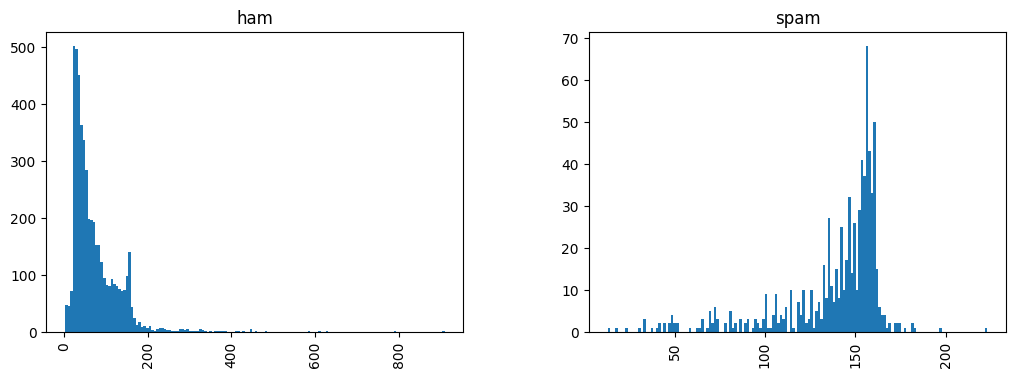

In [40]:
messages.hist(column='length',by='label',bins=150,figsize=(12,4))

### Processing the Data

#### First removing the punctuations and the stop words (frequent)

In [43]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    nopunc = [c for c in mess if c not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words("english")]

In [44]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [45]:
messages['message'].apply(text_process)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, U, £750, Pou...
5568                   [ü, b, going, esplanade, fr, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [Rofl, true, name]
Name: message, Length: 5572, dtype: object

In [46]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


#### Count victorizer for conveting to vectors 

In [48]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

print(len(bow_transformer.vocabulary_))

11425


In [57]:
message_10 = messages['message'][9]

In [58]:
bow_10 = bow_transformer.transform([message_10])

In [62]:
print(bow_10)
print("\n")
print(bow_10.shape)

  (0, 58)	1
  (0, 315)	1
  (0, 1417)	1
  (0, 1492)	1
  (0, 1865)	1
  (0, 1941)	1
  (0, 2852)	1
  (0, 3321)	1
  (0, 4068)	1
  (0, 4128)	2
  (0, 5304)	1
  (0, 5594)	1
  (0, 6328)	1
  (0, 7716)	1
  (0, 8216)	1
  (0, 8217)	1
  (0, 8251)	1


(1, 11425)


In [67]:
print(bow_transformer.get_feature_names_out()[5594])
print(bow_transformer.get_feature_names_out()[8217])

colour
mobiles


In [68]:
messages_bow = bow_transformer.transform(messages['message'])

In [75]:
print(messages_bow.shape)
print("Non Zero Ocurrances: ",messages_bow.nnz)

(5572, 11425)
Non Zero Ocurrances:  50548


#### Getting the terms frequencies and their relations to their corpus

In [80]:
tfidf_messages = TfidfTransformer().fit(messages_bow)

In [86]:
tfidf_messages_10 = tfidf_messages.transform(bow_10)
print(tfidf_messages_10)

  (0, 8251)	0.24241519917488308
  (0, 8217)	0.24860464952517933
  (0, 8216)	0.16878018627985983
  (0, 7716)	0.2113089707557115
  (0, 6328)	0.2521814272360164
  (0, 5594)	0.22507369610987876
  (0, 5304)	0.22183810709807938
  (0, 4128)	0.48483039834976616
  (0, 4068)	0.13464474024308146
  (0, 3321)	0.20511952040541523
  (0, 2852)	0.21019582218498448
  (0, 1941)	0.19606801326497764
  (0, 1865)	0.17217781851006528
  (0, 1492)	0.2561799245290503
  (0, 1417)	0.15512340375049818
  (0, 315)	0.24860464952517933
  (0, 58)	0.2894771060054842


In [91]:
messages_tfidf = tfidf_messages.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


### Building the Model

#### Using Naive Bayes Multinomial

In [93]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [95]:
print('predicted:', spam_detect_model.predict(tfidf_messages_10)[0])
print('expected:', messages.label[9])

predicted: spam
expected: spam


In [98]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


#### Classification Report

In [100]:
print (classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [103]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test))

4457 1115


#### Building PipeLine

In [104]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [105]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000207C2BE3560>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [106]:
predictions = pipeline.predict(msg_test)

In [107]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.95      0.98       998
        spam       0.72      1.00      0.84       117

    accuracy                           0.96      1115
   macro avg       0.86      0.98      0.91      1115
weighted avg       0.97      0.96      0.96      1115

